# matplotlib exercises

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Q1: planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [3]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [4]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [5]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

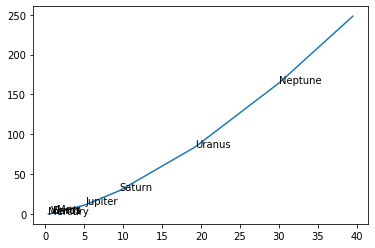

In [6]:
plt.plot(a,P)
for i in range(8):
    plt.text(a[i],P[i],names[i])
plt.show()

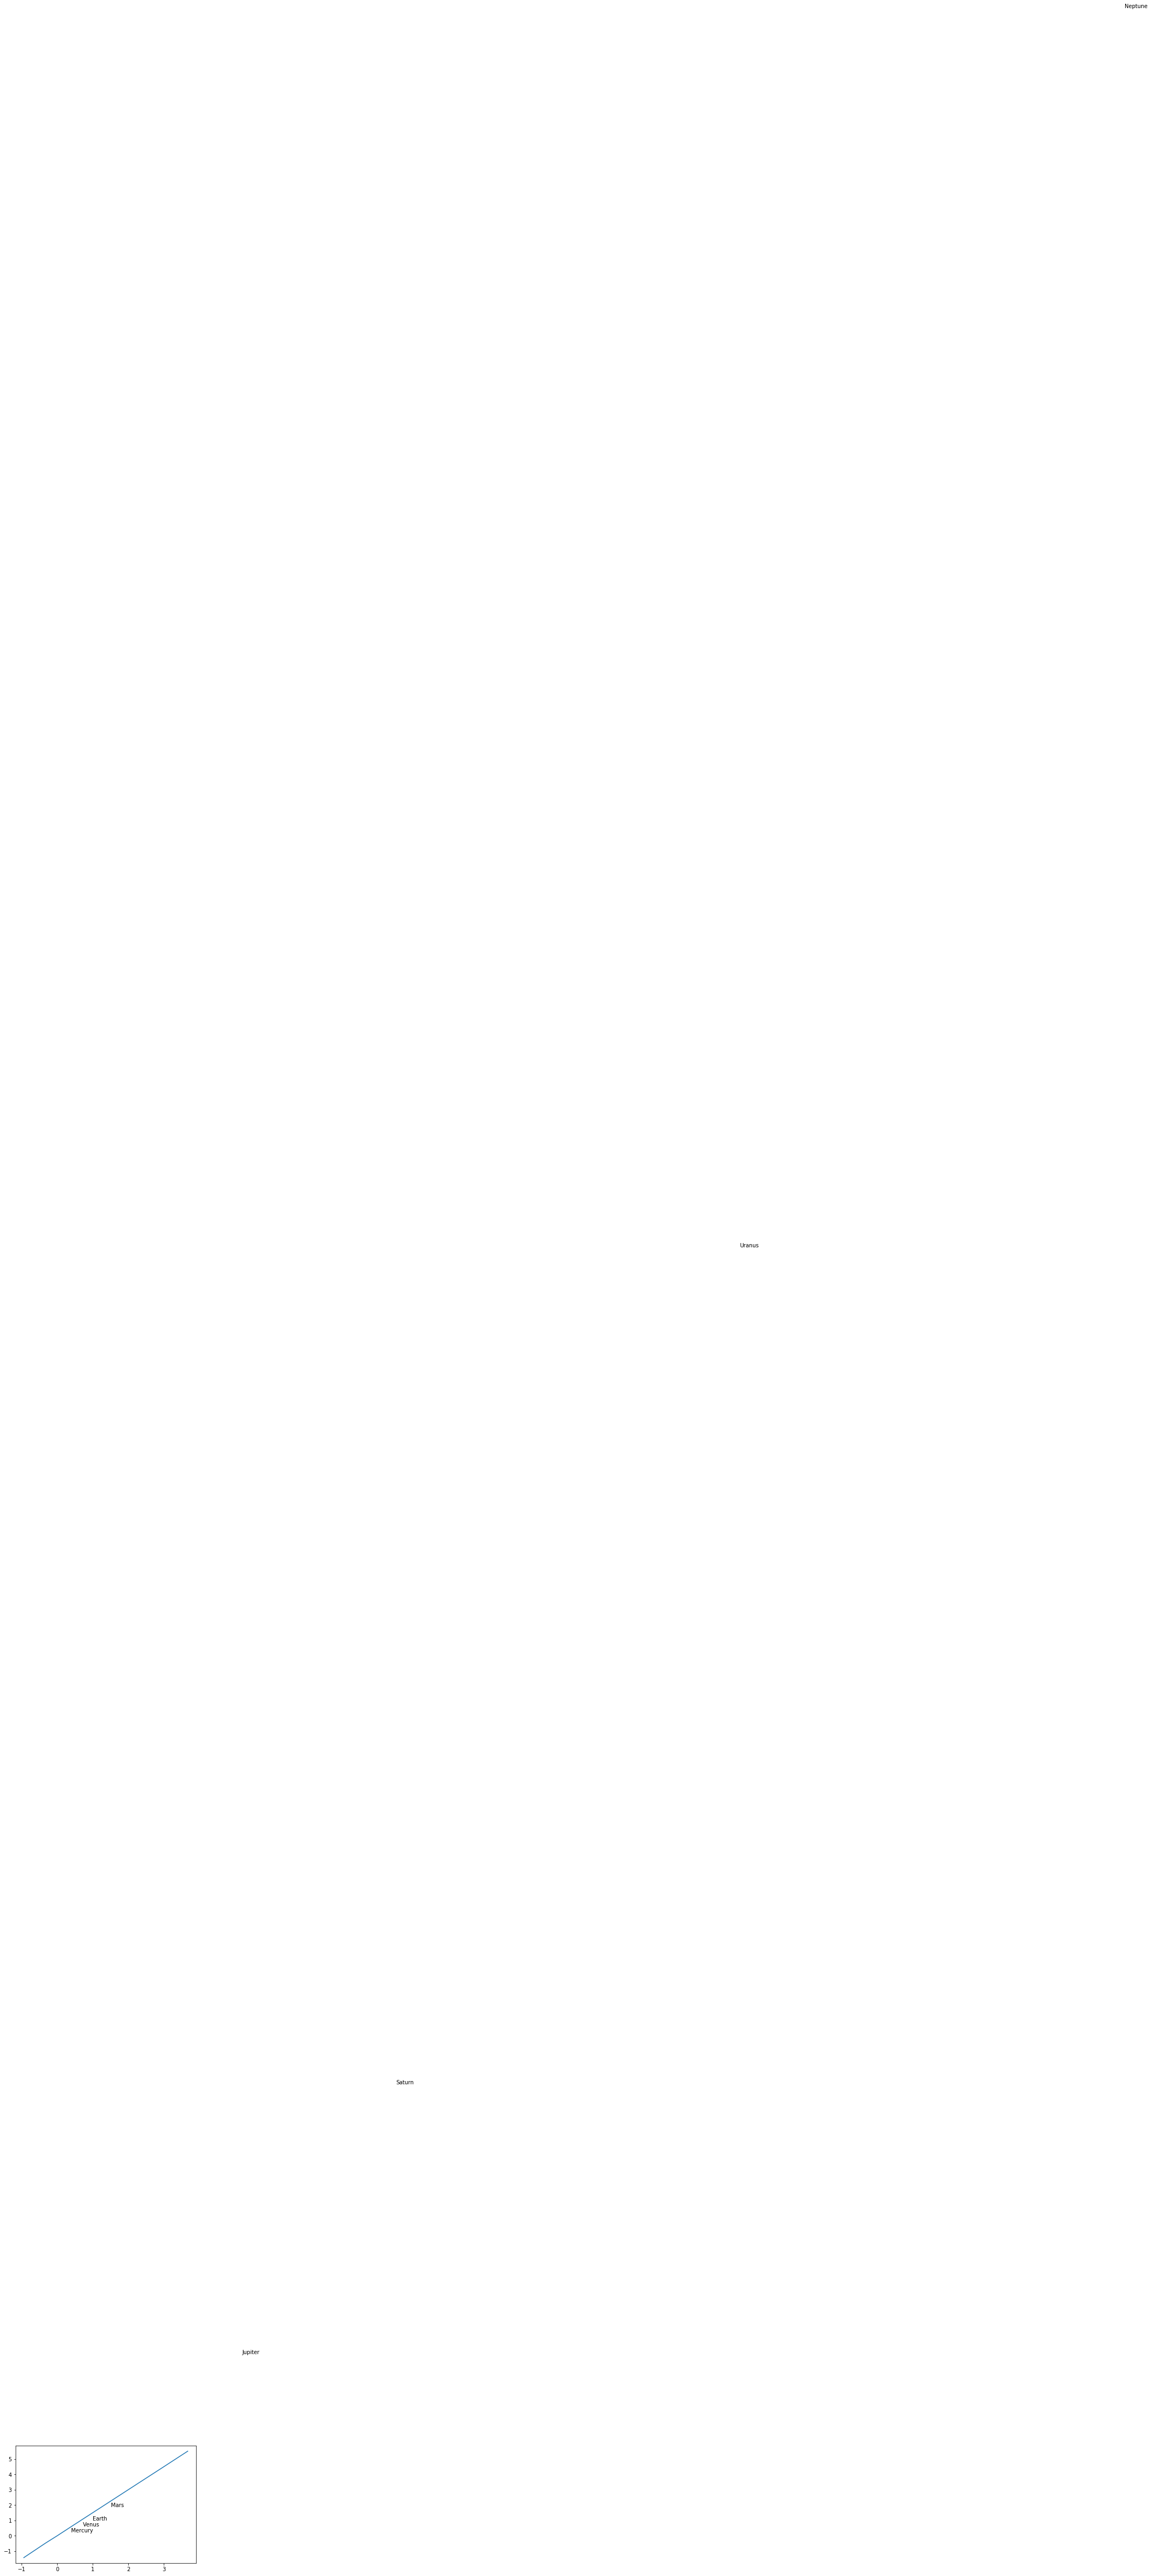

In [9]:
plt.plot(np.log(a),np.log(P))                            #点不能显示在同一张图
for i in range(8):
    plt.text(a[i],P[i],names[i])
plt.show()

## Q2: drawing a circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:
$$
x = R\cos(\theta)
$$
$$ 
y = R\sin(\theta)
$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

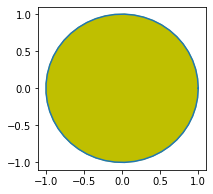

In [32]:
R = 1
plt.subplots(figsize=(3,3))
theta = np.linspace(0,2*np.pi)
x = R*np.cos(theta)
y = R*np.sin(theta)
plt.plot(x,y)
plt.fill(x,y,color='y')


## Q3: Circles, circles, circles...

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

([<matplotlib.lines.Line2D object at 0x0000017EDD866808>], [<matplotlib.patches.Polygon object at 0x0000017EDD7B32C8>])
([<matplotlib.lines.Line2D object at 0x0000017EDD8CA1C8>], [<matplotlib.patches.Polygon object at 0x0000017EDD7AA948>])
([<matplotlib.lines.Line2D object at 0x0000017EDD8D0CC8>], [<matplotlib.patches.Polygon object at 0x0000017EDD8DF9C8>])
([<matplotlib.lines.Line2D object at 0x0000017EDD8E6D48>], [<matplotlib.patches.Polygon object at 0x0000017EDD4EBAC8>])
([<matplotlib.lines.Line2D object at 0x0000017EDD8ED2C8>], [<matplotlib.patches.Polygon object at 0x0000017EDD8ED3C8>])
([<matplotlib.lines.Line2D object at 0x0000017EDD8DFC88>], [<matplotlib.patches.Polygon object at 0x0000017EDD8D7C88>])
([<matplotlib.lines.Line2D object at 0x0000017EDD8F3C08>], [<matplotlib.patches.Polygon object at 0x0000017EDD7B6208>])
([<matplotlib.lines.Line2D object at 0x0000017EDD900FC8>], [<matplotlib.patches.Polygon object at 0x0000017EDD903408>])
([<matplotlib.lines.Line2D object at 0x0

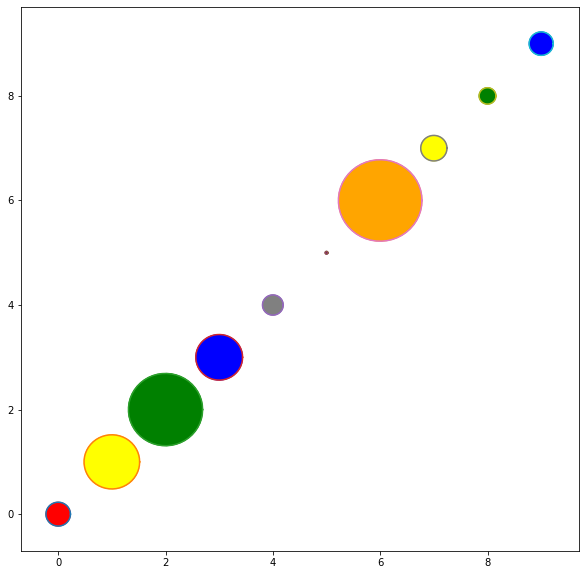

In [68]:
def draw_circle(x0,y0,R,color):
    theta = np.linspace(0,2*np.pi)
    x = R*np.cos(theta)+x0
    y = R*np.sin(theta)+y0
    return plt.plot(x,y),plt.fill(x,y,color=color)

colors = ['red','yellow','green','blue','gray','purple','orange','yellow','green','blue']   # 颜色列表
X0 = [0,1,2,3,4,5,6,7,8,9]
Y0 = [0,1,2,3,4,5,6,7,8,9]
RR = np.random.rand(10)

plt.subplots(figsize=(10,10))
for i in range(10):
    print(draw_circle(X0[i],Y0[i],RR[i],colors[i]))
plt.show()
                

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt

(this data comes from: https://data.giss.nasa.gov/gistemp/graphs/)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the NumPy `where()` function useful.

In [14]:
## 题1
data = np.loadtxt('nasa-giss.txt')
data    #??? 读取的结果和txt本身数值表现不同？
year = data[:,0]
temperature_change = data[:,1]
smoothed_change = data[:,2]

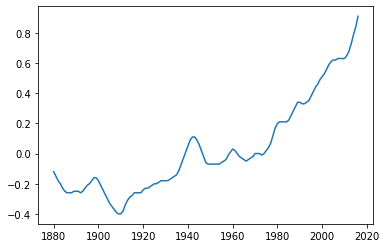

In [16]:
## 题2
plt.plot(year,smoothed_change)

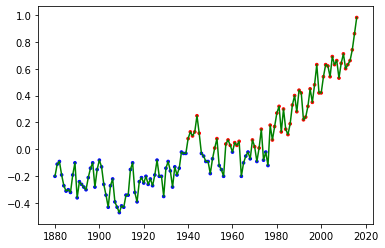

In [38]:
## 题3
color = np.where(temperature_change<0,'b','r')       #np.where(A,B,C):如果A成立，则执行B，否则执行C
plt.plot(year,temperature_change,'g-')
plt.scatter(x=year,y=temperature_change,color=color,s=7)

## Q5: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


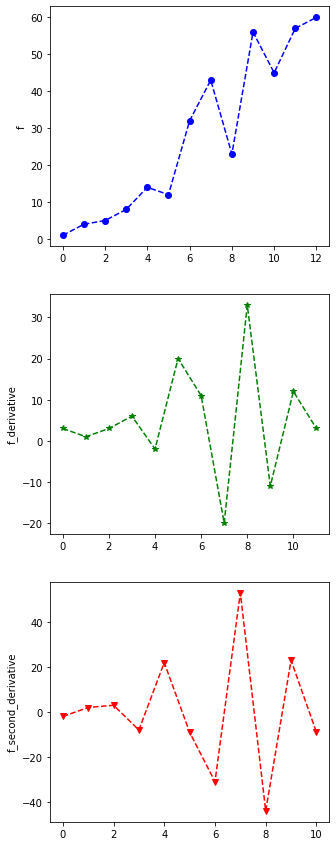

In [53]:
fig,ax = plt.subplots(3,1,figsize=(5,15))

f = np.array([1,4,5,8,14,12,32,43,23,56,45,57,60])
f_derivative = np.diff(f)
f_second_derivative = np.diff(f_derivative)

ax[0].plot(f,'bo--');ax[0].set_ylabel('f')
ax[1].plot(f_derivative,'g*--');ax[1].set_ylabel('f_derivative')
ax[2].plot(f_second_derivative,'rv--');ax[2].set_ylabel('f_second_derivative')

plt.show()

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

### 6.1 Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [72]:
f = open("shore_leave.txt", "r")
f_txt = f.read()                  # 通过open和read函数来读取文件

def wordcount(readtxt):
    readtxt = readtxt.replace(',','')    # 替换为空格
    readtxt = readtxt.replace('.','')
    readtxt = readtxt.lower()         #返回小写字符串
    readlist = readtxt.split()        # 通过空格分割，返回一个列表
    # 创建一个空字典，循环处理每个词汇
    dict = {}  
    for every_world in readlist:
        if every_world in dict:
            dict[every_world] += 1
        else:
            dict[every_world] = 1
    return  dict

print(wordcount(f_txt))


{'shore': 12, 'leave': 11, 'bridge': 12, 'enterprise': 2, 'is': 105, 'orbiting': 2, 'a': 133, 'very': 12, 'green': 5, 'planet': 19, 'and': 96, 'young': 6, 'female': 1, 'yeoman': 10, 'getting': 3, 'signature': 1, 'from': 18, 'the': 162, 'captain': 53, 'anything': 6, 'landing': 2, 'party': 4, 'they': 28, 'should': 6, 'be': 32, 'sending': 1, 'up': 21, 'report': 7, 'momentarily': 1, 'kirk': 33, 'stretches': 1, 'groans': 1, 'something': 6, 'wrong': 3, 'kink': 1, 'in': 40, 'my': 27, 'back': 17, 'behind': 4, 'his': 18, 'starts': 1, 'to': 102, 'massage': 1, 'it': 82, 'that': 47, 'little': 8, 'higher': 1, 'please': 1, 'push': 2, 'hard': 2, 'dig': 1, 'there': 27, 'mister': 33, 'spock': 23, 'steps': 1, 'forward': 1, 'realises': 1, 'who': 7, 'massaging': 1, 'lower': 1, 'thank': 5, 'you': 132, 'sufficient': 2, 'need': 4, 'sleep': 4, 'if': 7, 'not': 57, 'out': 18, 'of': 69, 'line': 3, 'i': 128, 'have': 50, 'enough': 1, 'doctor': 24, 'mccoy': 26, 'correct': 1, 'after': 10, 'what': 37, 'this': 46, 'sh

### 2. Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

In [109]:
# your code here
import pandas as pd 

dict_f = wordcount(f_txt)
s = pd.Series(dict_f)      # 字典转化为Series
df = pd.DataFrame(s)       # Series转化为数据框
df.head()

most_frequent = df.sort_values(by=0,ascending=False).head(25)
most_frequent.rename(columns={0:'frequencies'},inplace=True)
most_frequent


,frequencies
the,162
a,133
you,132
i,128
is,105
to,102
and,96
it,82
of,69
not,57
